# Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Loading the data
df = pd.read_csv('Cleaned_datasets/Combined_CleanData_V2.csv')

### Approaches to deal with outliers 🧐
For handling outliers there are 5 different approaches which we can use and these are
1. **Trimming**: Trimming outliers means removing them from the dataset. However, it's important to note that trimming can also lead to a lot of data loss in case there are a lot of outliers in our dataset.
2. **Capping**: Capping, also known as **Winsorizing**, involves setting a limit or threshold value and them replacing any value lying outside of that threshold value with that threshold value. Capping helps in reducing the impact of outliers but if there are a lot of outliers than it may change the distribution of the feature.
3. **Discretization**: In this technique we convert a numerical feature to categorical feature by creating bins and by creating bins we force the outliers to behave like other set of data points in that bin.
4. **Treating them as missing values:** In this technique we consider outliers and missing values and treat them accordingly.
5. **Mathematical transformation:**

### Ways to access potential outliers 🧲

Now before using any of the above mentioned approach we first need to identify outliers and then decide whether they are actually outliers, or they are some data points which are representing some hidden information in our dataset. Just like there are various approaches for dealing with outliers there are also some couple of ways to detect outliers and extract outliers. 
1. **Z-Score method**: This is used when the feature we are focusing on is having normal or sort of normal distribution. The way this technique works is that we simply convert the feature values into the z score and then extract those values which are more than 3 or less than -3, because these data points could be potential outliers.
2. **IQR Method**: This method is used when we have some skewness in our feature. Using this method we can find the lower limit and upper limit utilizing the IQR and Q1 or Q3 value.

In [2]:
# First we will only be considering the numerical features
df.select_dtypes(exclude = 'object').head(3)

,price,Price_Per_SQFT,Area,bedRoom,bathroom,floorNum,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0.45,5000.0,900,2.0,2.0,4,NaN,NaN,900.0,0,0,0,0,0,2,28.0
1,0.50,7692.0,650,2.0,2.0,1,NaN,NaN,650.0,0,0,0,0,0,0,37.0
2,0.40,6722.0,595,2.0,2.0,12,NaN,NaN,595.0,0,0,0,0,0,2,36.0


`Note`: Since we know that for the detection of outliers we can either use the statistical measures and visualization. So in our case to get more better understanding we will be using visualization graphs and plots. We will first plot the histogram for all the numerical features to see the distribution of the feature and then use appropriate technique to access and analyze outliers.

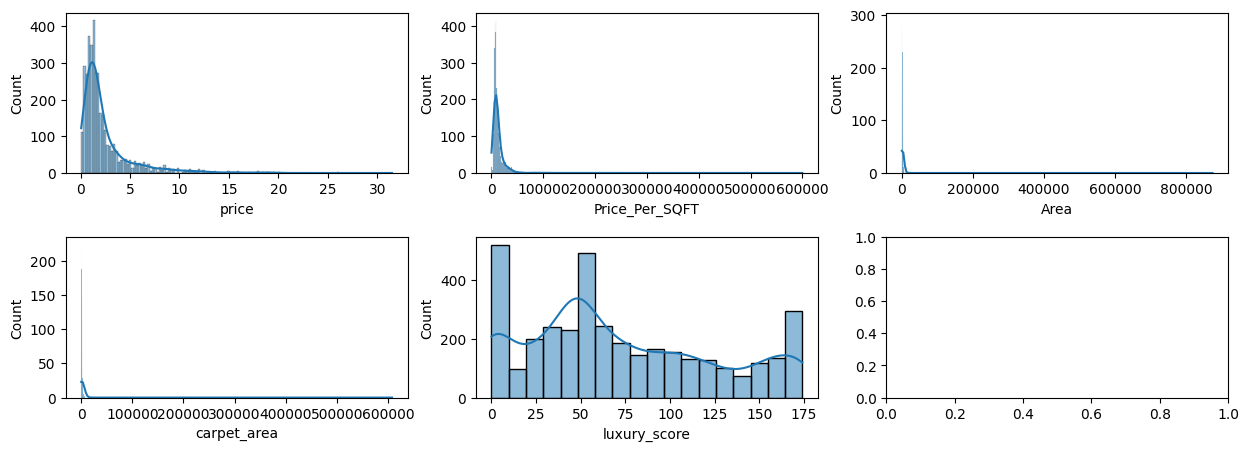

In [3]:
# Plotting histograms 
fig,ax = plt.subplots(2,3,figsize=(15,5))

sns.histplot(data=df['price'],kde=True,ax = ax[0][0])
sns.histplot(data=df['Price_Per_SQFT'],kde=True,ax = ax[0][1])
sns.histplot(data=df['Area'],kde=True,ax = ax[0][2])

sns.histplot(data=df['carpet_area'],kde=True,ax = ax[1][0])
sns.histplot(data=df['luxury_score'],kde=True,ax = ax[1][1])

plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.show()

Since all the numerical features are having strong skewness in their distribution so we will be using the IQR method to access the outlier data points.

In [4]:
def find_limit(series):
    """
    Input: Pandas series
    Output: List containing upper limit and lower limit
    """

    # Finding the q1 and q3 value to find the IQR
    q1_value = series.quantile(0.25)
    q3_value = series.quantile(0.75)
    IQR = q3_value-q1_value
    Upper_lmt = q3_value+1.5*IQR
    Lower_lmt = q1_value-1.5*IQR
    return [Upper_lmt,Lower_lmt]

### Outlier detection and removal : `price`

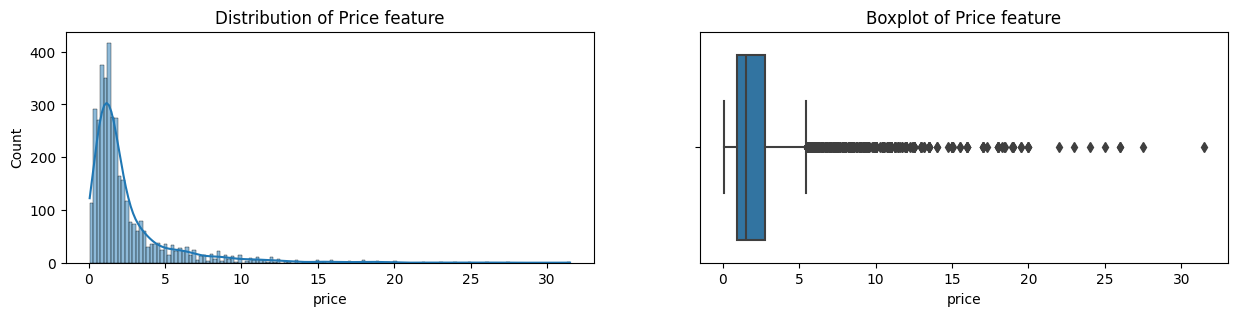

In [5]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['price'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of Price feature")

sns.boxplot(x = df['price'],ax = ax[1])
ax[1].set_title("Boxplot of Price feature")
plt.show()

In [6]:
Up_lmt,Lw_lmt = find_limit(df['price'])
Price_outliers = df[(df['price']<Lw_lmt) | (df['price']>Up_lmt)]
Price_outliers.shape

(426, 26)

**Observations about `price` feature**
- The price feature is not having outiers, instead above 15 crores all the property are independent_houses due to which their price is more than flats and this is also true as a fact. So we can say all independent_house data points above 15 crores can be treated as collective outliers and should not be removed.
- Since above 20 Crores there are only few properties (8) so we will simply trim the data points having more than 20 Cr price

In [7]:
# Let's check the range of flats price
print(df[df['Property_Type'] == 'flat']['price'].describe())
#Price_outliers[Price_outliers['price']>15]

count    2938.000000
mean        1.703615
std         1.363912
min         0.160000
25%         0.900000
50%         1.370000
75%         2.030000
max        15.000000
Name: price, dtype: float64


In [8]:
# Removing data points having more than 20 crore price
df = df[df['price']<20.0]

### Outliers detection and removal: `Price_Per_SQFT` 

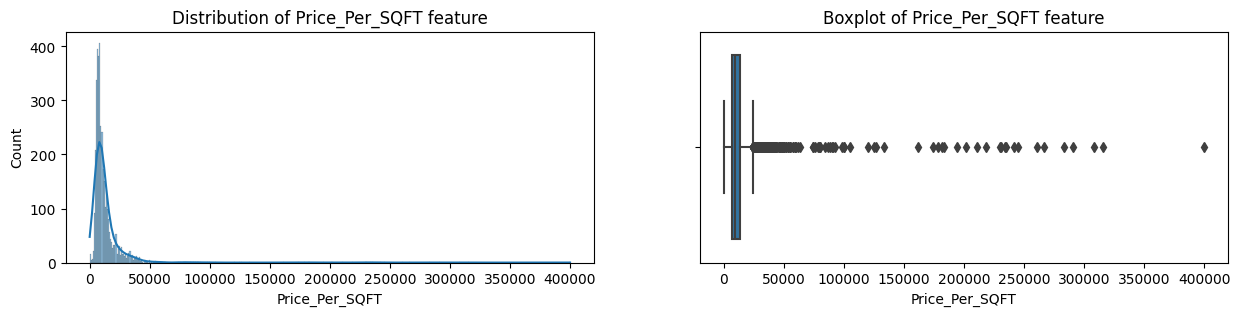

In [9]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['Price_Per_SQFT'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of Price_Per_SQFT feature")

sns.boxplot(x = df['Price_Per_SQFT'],ax = ax[1])
ax[1].set_title("Boxplot of Price_Per_SQFT feature")
plt.show()

In [10]:
Up_lmt,Lw_lmt = find_limit(df['Price_Per_SQFT'])

Outliers_pps = df[(df['Price_Per_SQFT']<Lw_lmt) | (df['Price_Per_SQFT']>Up_lmt)]
Outliers_pps.shape

(351, 26)

**Observations about `Price_Per_SQFT` feature**
- Out of flats and independent houses, most of properties are IH
- Out of all the outlier data points we will see that there are certain properties which are having Area less than 1000 and these are actually in term of square yards. So we will simply need to multiply them by 9 and then use them to recalculate the Price_Per_SQFT.

In [11]:
Outliers_pps.loc[:,'Area'] = Outliers_pps['Area'].apply(lambda x:x*9 if x<1000 else x)
Outliers_pps.loc[:,'Price_Per_SQFT'] = round((Outliers_pps['price']*10000000)/Outliers_pps['Area'])

# Updating the values
df.update(Outliers_pps)

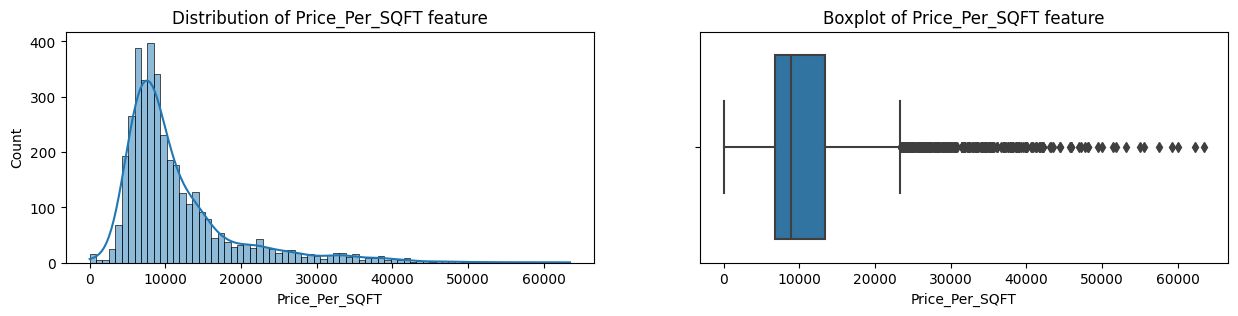

In [12]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['Price_Per_SQFT'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of Price_Per_SQFT feature")

sns.boxplot(x = df['Price_Per_SQFT'],ax = ax[1])
ax[1].set_title("Boxplot of Price_Per_SQFT feature")
plt.show()

### Outliers detection and removal: `Area` 

In [13]:
df['Area'].describe()

count      3785.000000
mean       2886.434082
std       22781.786321
min         145.000000
25%        1259.000000
50%        1741.000000
75%        2320.000000
max      875000.000000
Name: Area, dtype: float64

In [14]:
# Trimming outliers
df = df[df['Area'] < 10000]

In [15]:
Up_lmt,Lw_lmt = find_limit(df['Area'])

Area_outliers = df[(df['Area']<Lw_lmt) | (df['Area']>Up_lmt)]
Area_outliers.shape

(213, 26)

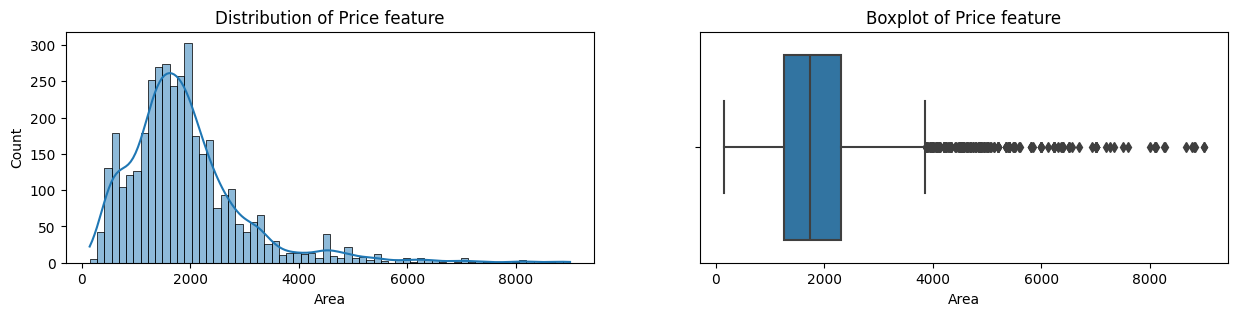

In [74]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['Area'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of Price feature")

sns.boxplot(x = df['Area'],ax = ax[1])
ax[1].set_title("Boxplot of Price feature")
plt.show()

### Outliers detection and removal: `bedRoom` 

In [12]:
# Only considring data points having 15 or less than 15 bedrooms
df = df[df['bedRoom'] <= 10.0]

### Outliers detection and removal: `luxury_score` 

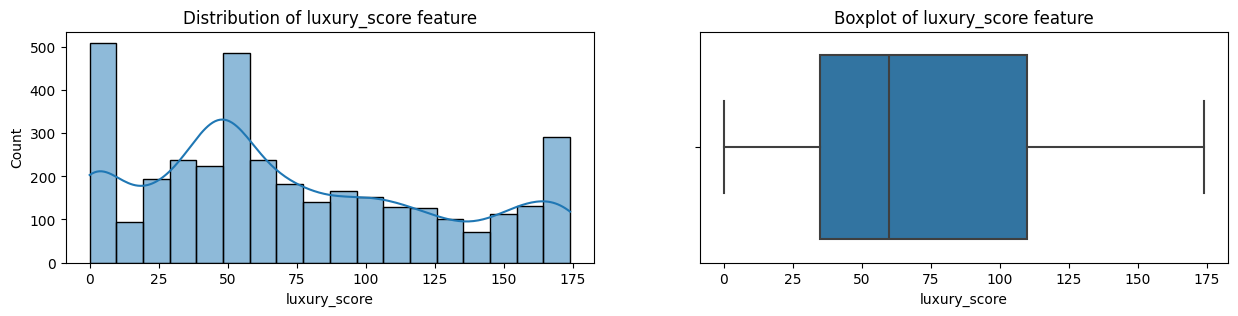

In [13]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['luxury_score'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of luxury_score feature")

sns.boxplot(x = df['luxury_score'],ax = ax[1])
ax[1].set_title("Boxplot of luxury_score feature")
plt.show()

### Outliers detection and removal: `Super built up area, Built up area and Carpet Area` 

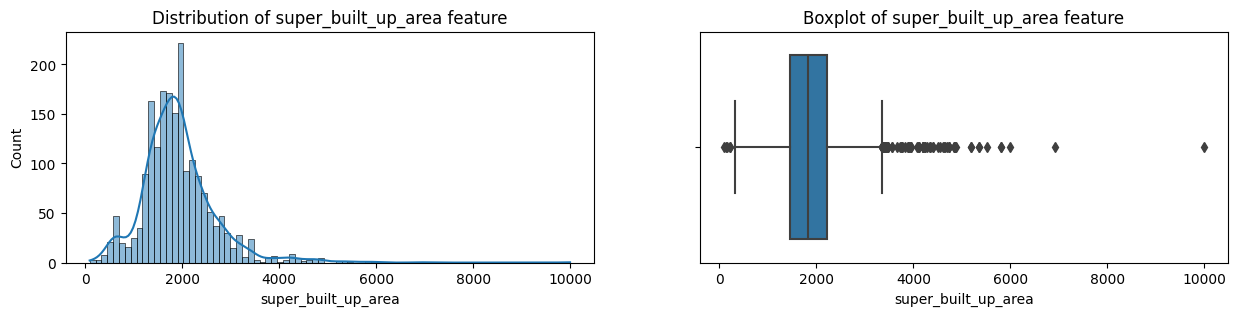

In [17]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['super_built_up_area'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of super_built_up_area feature")

sns.boxplot(x = df['super_built_up_area'],ax = ax[1])
ax[1].set_title("Boxplot of super_built_up_area feature")
plt.show()

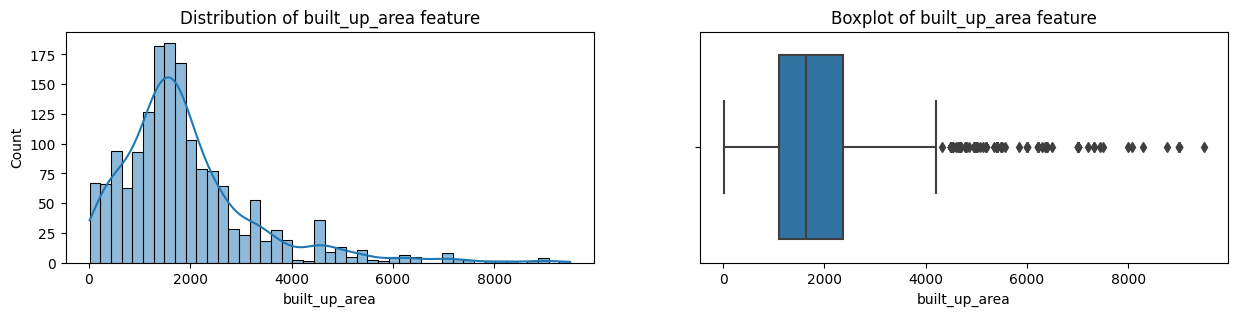

In [18]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['built_up_area'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of built_up_area feature")

sns.boxplot(x = df['built_up_area'],ax = ax[1])
ax[1].set_title("Boxplot of built_up_area feature")
plt.show()

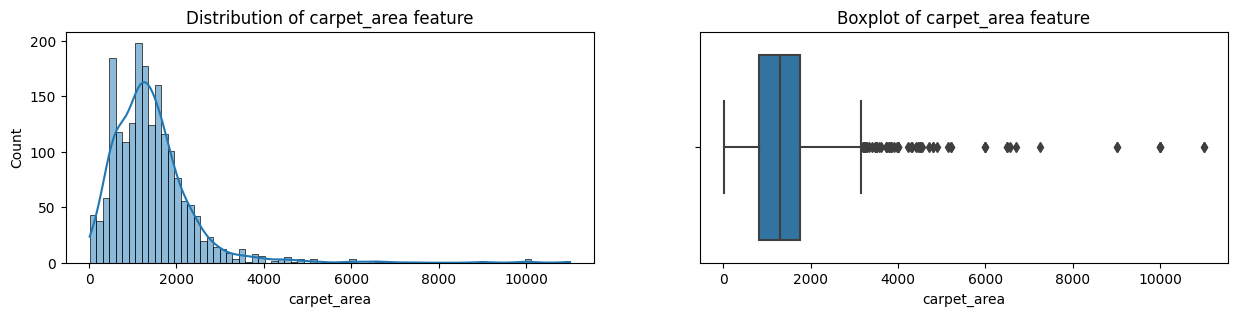

In [19]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['carpet_area'],kde=True,ax = ax[0])
ax[0].set_title("Distribution of carpet_area feature")

sns.boxplot(x = df['carpet_area'],ax = ax[1])
ax[1].set_title("Boxplot of carpet_area feature")
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3710 entries, 0 to 3795
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_name        3710 non-null   object 
 1   Property_Type        3710 non-null   object 
 2   society              3709 non-null   object 
 3   sector               3710 non-null   object 
 4   price                3710 non-null   float64
 5   Price_Per_SQFT       3710 non-null   float64
 6   bedRoom              3710 non-null   float64
 7   bathroom             3710 non-null   float64
 8   balcony              3710 non-null   object 
 9   address              3701 non-null   object 
 10  floorNum             3710 non-null   int64  
 11  facing               2620 non-null   object 
 12  agePossession        3710 non-null   object 
 13  description          3710 non-null   object 
 14  rating               3371 non-null   object 
 15  super_built_up_area  1914 non-null   float6